## Cleaning, Plotting the Data

In [301]:
%load_ext rpy2.ipython
%load_ext autoreload    
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [302]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [303]:
%%R

# My commonly used R imports
require('tidyverse')

# Cleaning the dataset that contains Australian visa data 

In [304]:
df = pd.read_csv("./data/irl_medical_practitioner.csv")

This is a dataframe with the number of medical visas granted in Australia (subclass 457)

In [305]:
df

,Nominated Position Location (State),2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23 to 31 October 2022
0,Australian Capital Territory,NaN,NaN,NaN,NaN,<5,<5,NaN,<5,8.0,<5,NaN,NaN,NaN,NaN,NaN,<5,9,NaN
1,New South Wales,20,36,60,51,46,36,33,20,33.0,13,21,18,13,6,7,8,12,6
2,Northern Territory,<5,5,<5,<5,<5,<5,<5,NaN,NaN,<5,<5,NaN,<5,<5,<5,5,8,NaN
3,Queensland,19,25,32,23,32,25,30,24,12.0,40,35,57,40,53,42,48,40,31
4,South Australia,NaN,<5,<5,<5,<5,<5,11,10,15.0,7,<5,7,34,16,27,<5,10,<5
5,Tasmania,NaN,<5,<5,<5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<5,NaN,NaN,NaN,NaN,<5,NaN
6,Victoria,17,26,42,30,32,46,47,33,37.0,43,31,43,31,27,29,31,63,45
7,Western Australia,<5,8,24,16,44,29,64,65,55.0,44,109,138,167,142,192,266,262,95
8,Not Specified,<5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,60,102,165,126,160,141,186,154,160.0,150,199,264,287,245,298,361,405,180


In [306]:
# remove the row where the state is not specified
df = df.drop([8])

In [307]:
df = df.rename(columns={"Nominated Position Location (State)": "State"})

In [308]:
df = df.set_index("State")

In [309]:
df_2021_22 = df[["2021-22"]]

In [310]:
df_2021_22 = df_2021_22.reset_index()

In [311]:
df_2021_22 = df_2021_22.rename(columns={"2021-22": "Count"})

In [312]:
df_2021_22["Count"] = df_2021_22["Count"].str.replace("<", "")
df_2021_22["Count"] = df_2021_22["Count"].astype(float)

In [313]:
df_2021_22 = df_2021_22.dropna()

In [314]:
df_2021_22

,State,Count
0,Australian Capital Territory,9.0
1,New South Wales,12.0
2,Northern Territory,8.0
3,Queensland,40.0
4,South Australia,10.0
5,Tasmania,5.0
6,Victoria,63.0
7,Western Australia,262.0


In [315]:
# replace 5 in other with 1 (editorial decision, not going to overestimate - instead going to take the minumim possible value for this category)

df_2021_22.loc[df_2021_22['Count'] == 5, 'Count'] = 1

In [316]:
# combine rows where the count is less than 8 into one row called "Other"

df_2021_22.loc[df_2021_22['Count'] < 12, 'State'] = 'Other'

In [317]:
df_2021_22["Count"].sum()

405.0

In [318]:
df_2021_22 = df_2021_22.groupby("State").sum()

In [319]:
df_2021_22.sum()

Count    405.0
dtype: float64

In [320]:

df_2021_22 = df_2021_22.reset_index()

In [321]:
df_2021_22

,State,Count
0,New South Wales,12.0
1,Other,28.0
2,Queensland,40.0
3,Victoria,63.0
4,Western Australia,262.0


In [322]:
# make a column called From and set it to "Ireland" -> this might be helpful for plotting later

df_2021_22["From"] = "Ireland"
df_2021_22 = df_2021_22.rename(columns={"State": "To"})

In [323]:
df_2021_22["Count"] = df_2021_22["Count"].astype(int)

In [324]:
df_2021_22

,To,Count,From
0,New South Wales,12,Ireland
1,Other,28,Ireland
2,Queensland,40,Ireland
3,Victoria,63,Ireland
4,Western Australia,262,Ireland


In [325]:
df_2021_22.to_csv("./data/medical_visas_2021_22.csv", index=False)

### Back to the same dataframe, but now we're taking a look at the totals

In [326]:
df

df = df.reset_index()

In [327]:
# replace NaN with AUS in the column State  

df["State"] = df["State"].fillna("AUS")

In [328]:
df

,State,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23 to 31 October 2022
0,Australian Capital Territory,NaN,NaN,NaN,NaN,<5,<5,NaN,<5,8.0,<5,NaN,NaN,NaN,NaN,NaN,<5,9,NaN
1,New South Wales,20,36,60,51,46,36,33,20,33.0,13,21,18,13,6,7,8,12,6
2,Northern Territory,<5,5,<5,<5,<5,<5,<5,NaN,NaN,<5,<5,NaN,<5,<5,<5,5,8,NaN
3,Queensland,19,25,32,23,32,25,30,24,12.0,40,35,57,40,53,42,48,40,31
4,South Australia,NaN,<5,<5,<5,<5,<5,11,10,15.0,7,<5,7,34,16,27,<5,10,<5
5,Tasmania,NaN,<5,<5,<5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<5,NaN,NaN,NaN,NaN,<5,NaN
6,Victoria,17,26,42,30,32,46,47,33,37.0,43,31,43,31,27,29,31,63,45
7,Western Australia,<5,8,24,16,44,29,64,65,55.0,44,109,138,167,142,192,266,262,95
8,AUS,60,102,165,126,160,141,186,154,160.0,150,199,264,287,245,298,361,405,180


In [329]:
df = df[df["State"] == "AUS"]

In [330]:
df

,State,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23 to 31 October 2022
8,AUS,60,102,165,126,160,141,186,154,160.0,150,199,264,287,245,298,361,405,180


In [331]:
# remove index column

df = df.drop(columns=["State"])

In [332]:
# remove the last column

df = df.drop(columns=["2022-23 to 31 October 2022"])

In [333]:
df

,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22
8,60,102,165,126,160,141,186,154,160.0,150,199,264,287,245,298,361,405


In [334]:
# switch the columns and rows

df = df.transpose()

In [335]:
df_total_visas = df

df_total_visas

,8
2005-06,60
2006-07,102
2007-08,165
2008-09,126
2009-10,160
2010-11,141
2011-12,186
2012-13,154
2013-14,160.0
2014-15,150


### Reading the data on visas granted to applicants between the age of 20 and 29

In [336]:
df_20s_visas = pd.read_csv("./data/irl_medical_practitioner_20-29.csv")

In [337]:
df_20s_visas

,Applicant Type,Nominated Position Location (State),2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23 to 31 October 2022
0,Primary,Australian Capital Territory,NaN,NaN,NaN,NaN,<5,<5,NaN,<5,7.0,<5,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN
1,NaN,New South Wales,12,26,43,43,35,25,24.0,12,21.0,6,14,8,6,6,<5,5,12,<5
2,NaN,Northern Territory,<5,<5,<5,NaN,<5,<5,NaN,NaN,NaN,NaN,NaN,NaN,<5,<5,NaN,<5,6,NaN
3,NaN,Queensland,11,15,18,18,24,25,24.0,19,9.0,36,30,49,35,46,37,40,36,30
4,NaN,South Australia,NaN,NaN,NaN,NaN,<5,<5,8.0,6,10.0,<5,<5,6,33,13,24,<5,9,<5
5,NaN,Tasmania,NaN,NaN,<5,<5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<5,NaN,NaN,NaN,NaN,<5,NaN
6,NaN,Victoria,7,13,21,18,18,27,27.0,15,15.0,25,15,31,24,19,28,26,60,40
7,NaN,Western Australia,<5,7,20,15,42,25,46.0,50,43.0,37,102,127,154,133,184,253,247,88
8,NaN,Not Specified,<5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Grand Total,NaN,33,64,104,95,124,105,129.0,104,105.0,109,162,222,253,218,277,330,378,164


In [338]:
# only keep row wher applicant type is "Grand Total"

df_20s_visas = df_20s_visas[df_20s_visas["Applicant Type"] == "Grand Total"]

In [339]:
df_20s_visas

,Applicant Type,Nominated Position Location (State),2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23 to 31 October 2022
9,Grand Total,NaN,33,64,104,95,124,105,129.0,104,105.0,109,162,222,253,218,277,330,378,164


In [340]:
df_20s_visas = df_20s_visas.drop(columns=["2022-23 to 31 October 2022"])

In [341]:
df_20s_visas

,Applicant Type,Nominated Position Location (State),2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22
9,Grand Total,NaN,33,64,104,95,124,105,129.0,104,105.0,109,162,222,253,218,277,330,378


In [342]:
df_20s_visas = df_20s_visas.drop(columns=["Nominated Position Location (State)"])

In [343]:
df_20s_visas = df_20s_visas.drop(columns=["Applicant Type"])

In [344]:
df_20s_visas = df_20s_visas.transpose()

In [345]:
df_20s_visas = df_20s_visas.rename(columns={9: "visas_20s"})

In [346]:
# merge df total visas and df_20s_visas

df_total_visas = df_total_visas.merge(df_20s_visas, left_index=True, right_index=True)

In [347]:
df_total_visas = df_total_visas.rename(columns={8: "all_visas"})

In [348]:
df_total_visas = df_total_visas.reset_index()

In [349]:
df_total_visas = df_total_visas.rename(columns={"index": "year"})

In [350]:
df_total_visas["all_visas"] = df_total_visas["all_visas"].astype(int)
df_total_visas["visas_20s"] = df_total_visas["visas_20s"].astype(int)
df_total_visas["diff"] = df_total_visas["all_visas"] - df_total_visas["visas_20s"]

In [351]:
df_total_visas

,year,all_visas,visas_20s,diff
0,2005-06,60,33,27
1,2006-07,102,64,38
2,2007-08,165,104,61
3,2008-09,126,95,31
4,2009-10,160,124,36
5,2010-11,141,105,36
6,2011-12,186,129,57
7,2012-13,154,104,50
8,2013-14,160,105,55
9,2014-15,150,109,41


In [352]:
df_total_visas.to_csv("./data/all_visas_cleaned.csv")

In [353]:
%%R

df <- read_csv("./data/all_visas_cleaned.csv")

New names:
• `` -> `...1`
Rows: 17 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): year
dbl (4): ...1, all_visas, visas_20s, diff

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


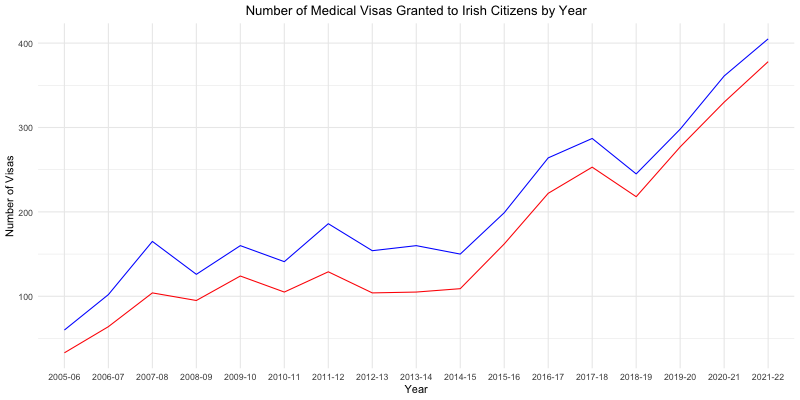

In [354]:
%%R -w 800 -h 400

# plot a line chart with one line for all visas and one line for 20s visas and the year as the x axis 
df %>%
    ggplot(aes(x=year, y=all_visas, group=1)) +
    geom_line(color="blue") +
    geom_line(aes(y=visas_20s), color="red") +
    labs(title="Number of Medical Visas Granted to Irish Citizens by Year", x="Year", y="Number of Visas") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))


In [355]:
# %%R

# ggsave("./images/medical_visas.pdf", width=8, height=4)

## Looking at the number of medical graduates in the OECD, and the doctors per 100,000 people

In [356]:
doctors_df = pd.read_csv("./data/doctors.csv")

In [357]:
doctors_df = doctors_df.rename(columns={"Country": "country"})

In [358]:
grads_df = pd.read_csv("./data/medical_grads_2019.csv")

In [359]:
grads_df

,country,count_per_100000
0,Ireland,24.8
1,Latvia,23.5
2,Denmark,23.0
3,Lithuania,20.4
4,Belgium,17.6
5,Italy,17.6
6,Slovak Republic,17.2
7,Czech Republic,16.1
8,Australia,15.9
9,Portugal,15.8


In [360]:
# merge the two dfs

merged_df = doctors_df.merge(grads_df, on="country")

In [361]:
merged_df = merged_df.rename(columns={"doctors_per_1000": "doctors_1000", " count_per_100000": "grads_100000"})

In [362]:
merged_df

# list columns

merged_df.columns

Index(['country', 'doctors_1000', 'grads_100000'], dtype='object')

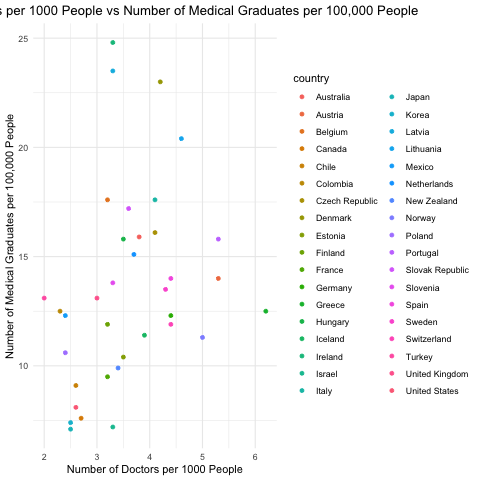

In [363]:
%%R -i merged_df

# plot a scatter plot with the number of doctors as the x axis and the number of medical grads as the y axis and highlight the country with the most doctors

merged_df %>%
    ggplot(aes(x=doctors_1000, y=grads_100000, color=country)) +
    geom_point() +
    labs(title="Number of Doctors per 1000 People vs Number of Medical Graduates per 100,000 People", x="Number of Doctors per 1000 People", y="Number of Medical Graduates per 100,000 People") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))
    
    

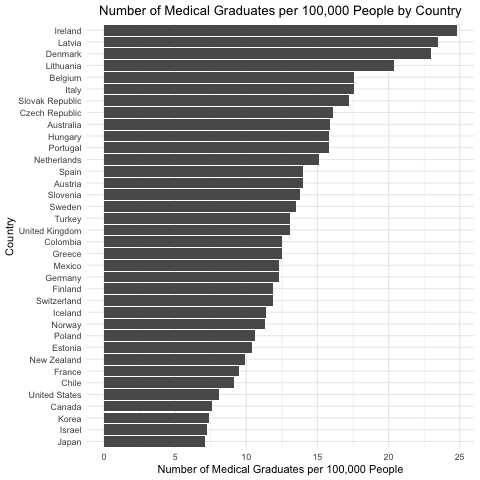

In [364]:
%%R 

# make a horizontal bar chart with the number of grads as the y axis and the country as the x axis from the merged_df and order the countries by the number of grads

merged_df %>%
    ggplot(aes(x=country, y=grads_100000)) +
    geom_col() +
    labs(title="Number of Medical Graduates per 100,000 People by Country", x="Country", y="Number of Medical Graduates per 100,000 People") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5)) +
    coord_flip() +
    scale_x_discrete(limits=merged_df$country[order(merged_df$grads_100000, decreasing = FALSE)])


In [365]:
# %%R

# ggsave("./images/medical_grads.pdf", width=8, height=4)